In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import draw, morphology

In [4]:
a = 57

In [3]:
img = np.loadtxt('img_array.txt')

OSError: img_array.txt not found.

In [296]:
img = np.where(img == 0., 1., img)

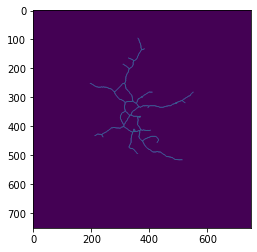

In [297]:
plt.imshow(img)

In [155]:
circ = np.loadtxt('circ_array.txt')

In [156]:
circles = ['1']
arr = np.zeros(np.shape(circ)[0:2])
rr, cc = draw.circle_perimeter(int(320), int(400), radius=140, shape=arr.shape)
arr[rr, cc] = 255
circles = arr

In [158]:
dilated_mgla = morphology.dilation(img, morphology.disk(radius=1))

In [166]:
def calc_intersection(circ_arr, skeleton_arr):
    intersects = []

    for i in range(len(circ_arr)):
        for j in range(len(skeleton_arr)):
            if circ_arr[i][j] == skeleton_arr[i][j]:
                intersects = np.append(intersects, [i, j])
            elif circ_arr[i][j] != skeleton_arr[i][j]:
                pass
    return(intersects)

In [169]:
calc_intersection(circles, dilated_mgla)

array([192., 343., 193., 341., 193., 342., 194., 340., 199., 329., 200.,
       328., 271., 269., 272., 268., 294., 538., 295., 538., 296., 538.,
       405., 289., 406., 290., 445., 336., 445., 337., 446., 338., 458.,
       379., 459., 380., 459., 381., 459., 382.])

In [170]:
img = dilated_mgla.copy()

In [171]:
z = ['l']

intersections = []
z = calc_intersection(circles, img)
intersections = np.append(intersections, len(calc_intersection(circles, img))/2)

In [172]:
it = -1
pairs = []
xs = []
ys = []
pairs = zip(z[::2], z[1::2])
for inter in list(pairs):
    xs = np.append(xs, inter[0])
    ys = np.append(ys, inter[1])

x, y = xs, ys

In [173]:
x

array([192., 193., 193., 194., 199., 200., 271., 272., 294., 295., 296.,
       405., 406., 445., 445., 446., 458., 459., 459., 459.])

In [174]:
y

array([343., 341., 342., 340., 329., 328., 269., 268., 538., 538., 538.,
       289., 290., 336., 337., 338., 379., 380., 381., 382.])

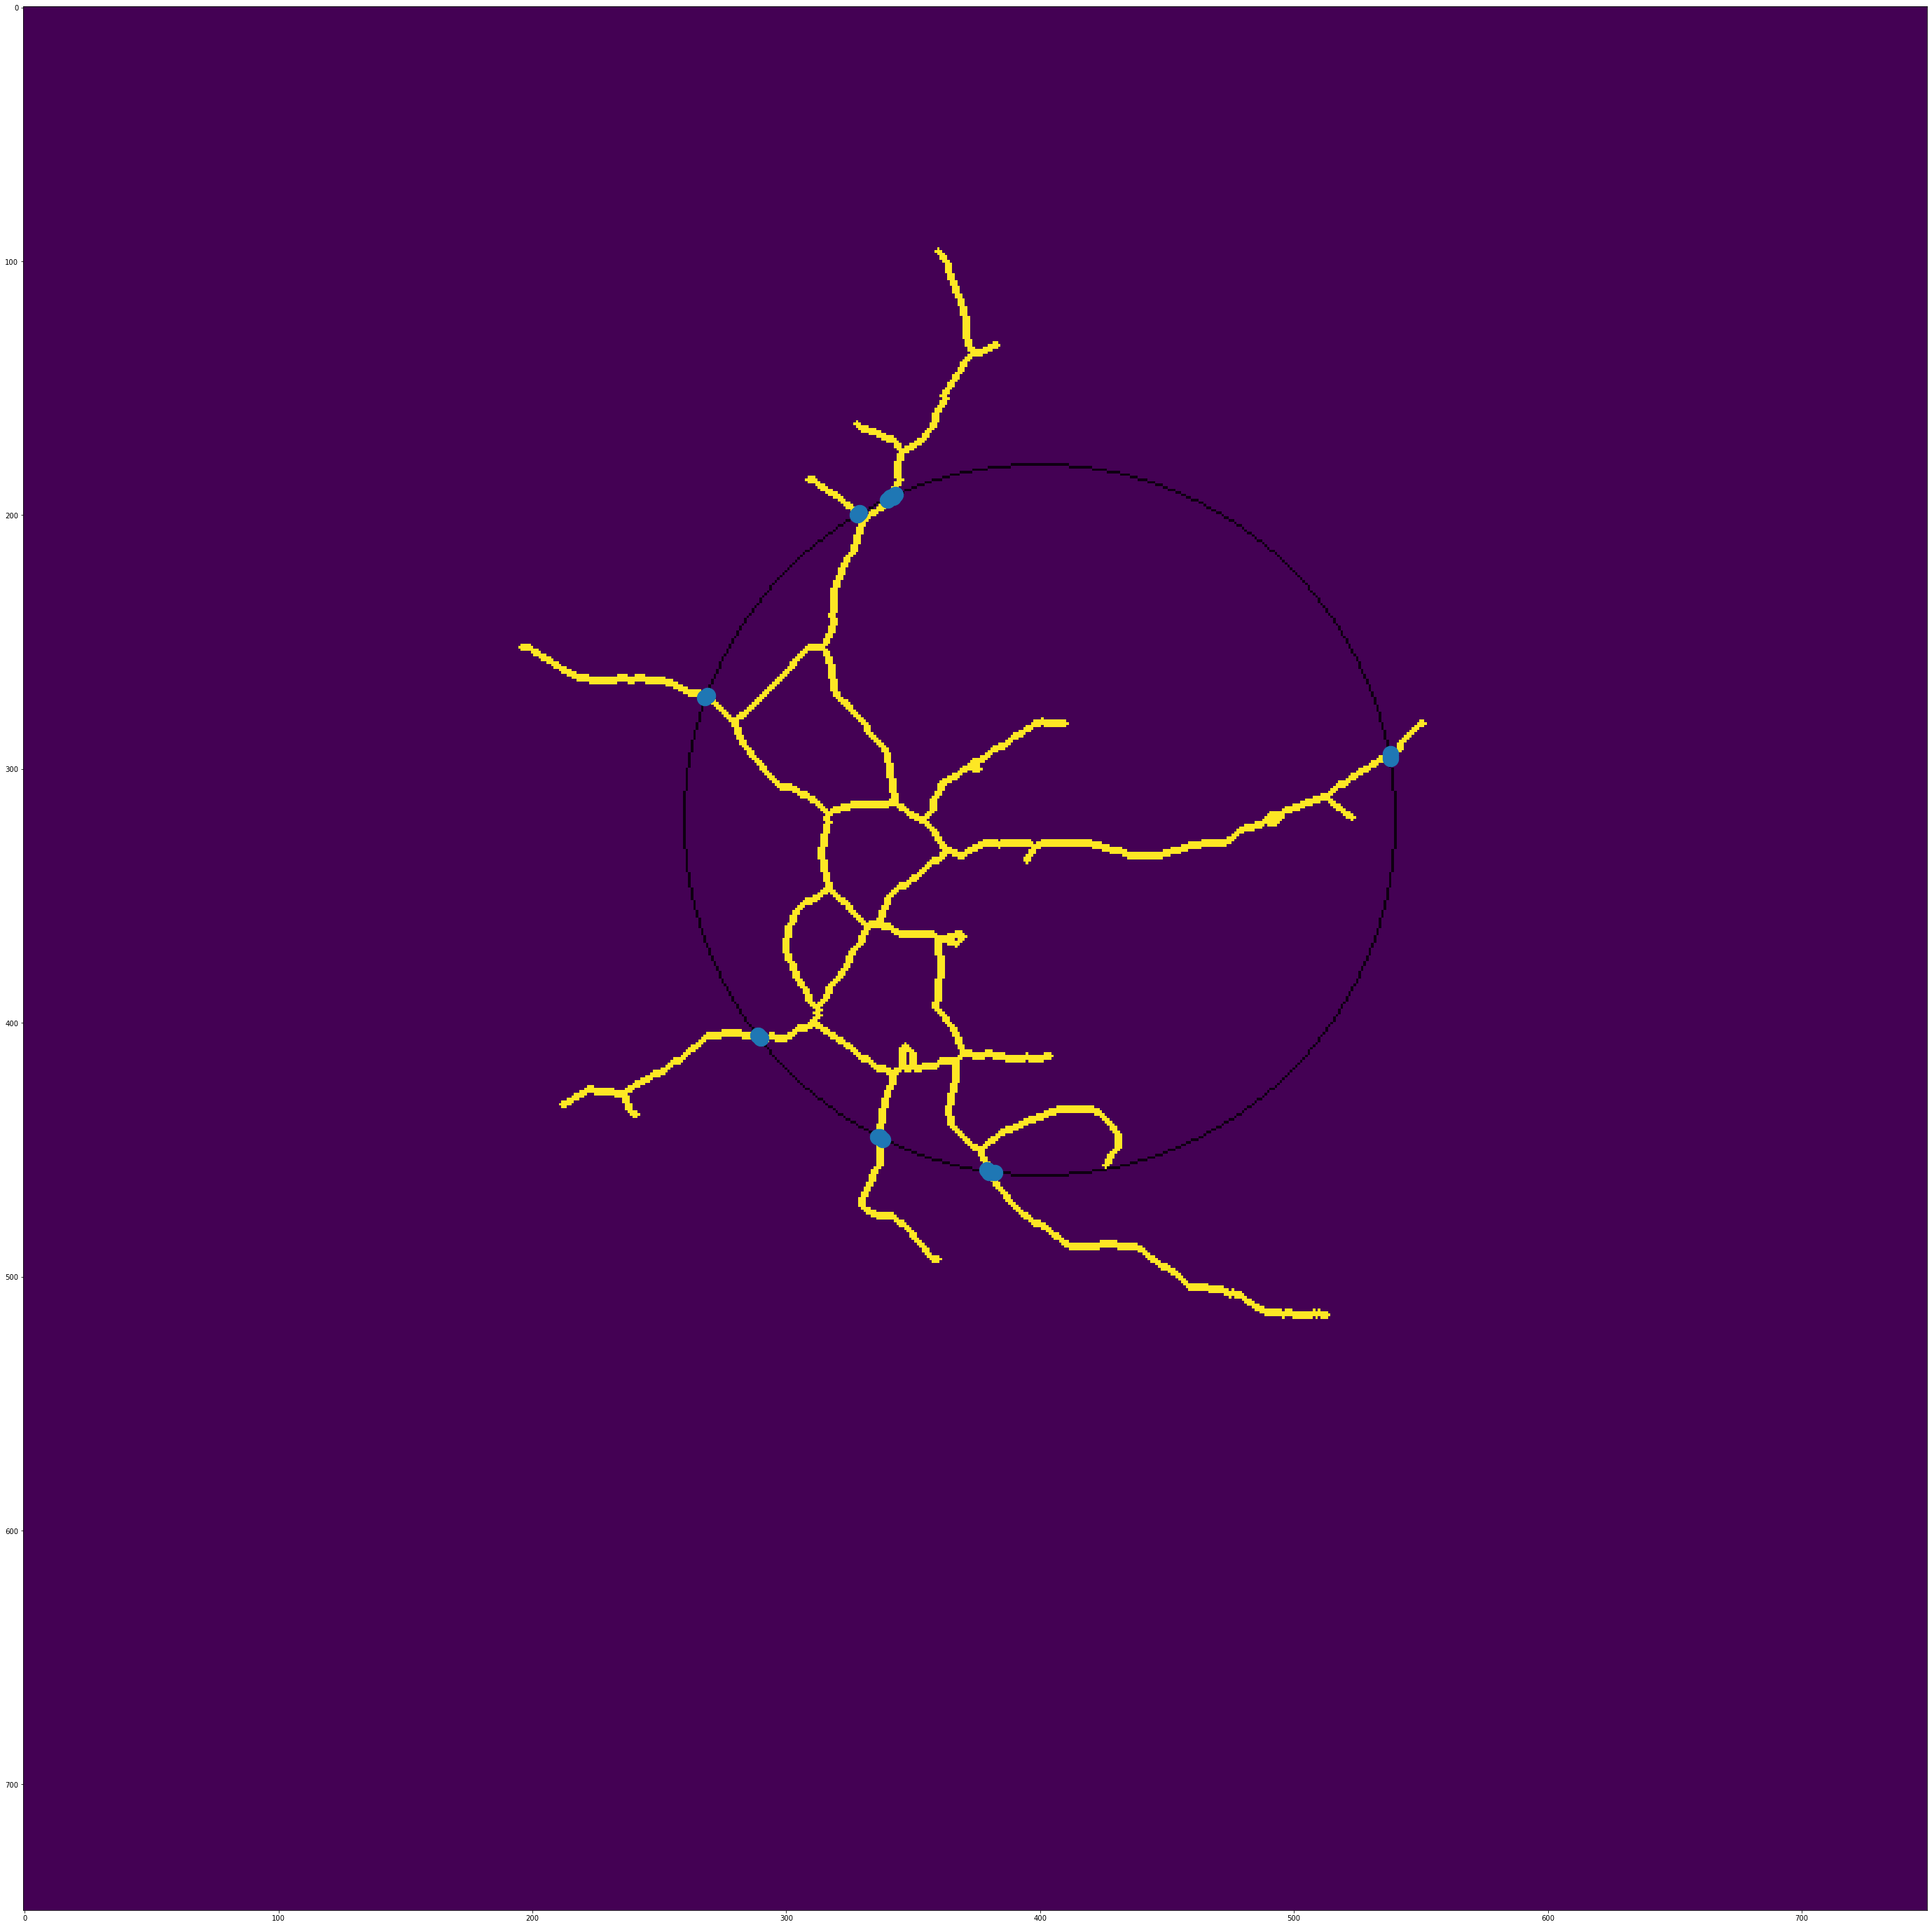

In [175]:
import matplotlib as mpl
from matplotlib.colors import colorConverter
color1 = colorConverter.to_rgba('white')
color2 = colorConverter.to_rgba('black')
cmap2 = mpl.colors.LinearSegmentedColormap.from_list('my_cmap2',[color1,color2],256)
cmap2._init() # create the _lut array, with rgba values
alphas = np.linspace(0, 0.8, cmap2.N+3)
cmap2._lut[:,-1] = alphas

fig, ax1 = plt.subplots(1, figsize = (50,50), sharey = False)
ax1.imshow(img, origin = 'lower')
ax1.imshow(circles, interpolation='nearest', origin='lower', cmap = cmap2)
ax1.invert_yaxis()
ax1.scatter(y, x, s = 500)

In [214]:
def dist_formula(x1, y1, x2, y2):
    import numpy as np

    d = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    return d

In [215]:
list_of_intersections = [(x[0], y[0])]

for i in range(len(x)):
    list_of_intersections = np.vstack((list_of_intersections, (x[i], y[i])))

In [281]:
## cleaning intersection arrays by calculating distance and making them duplicate if they are close

cleaned_intersections = pd.DataFrame(list_of_intersections.copy())

for cur in cleaned_intersections.iterrows():
    
    for new in cleaned_intersections.iterrows():
        
        if dist_formula(cur[1][0], cur[1][1], new[1][0], new[1][1]) < 5:
            ## and now to set the new index values equal to the current index values
            cleaned_intersections.loc[new[0]] = cleaned_intersections.loc[cur[0]]
        
        ##if they are within a certain distance of one another, make them duplicates
        ##which we can then remove later on

0.0
True
0.0
True
2.23606797749979
True
1.4142135623730951
True
3.605551275463989
True
15.652475842498529
17.0
108.2450922675019
109.65856099730654
220.06589922111968
220.53117693423758
221.0
219.73848092675985
220.4654167891191
253.09681941897256
253.07113624433742
254.04920783186867
268.4250360901531
269.5514793133215
269.69056342408425
269.8332818612263
0.0
True
0.0
True
0.0
True
0.0
True
0.0
True
15.652475842498529
17.0
108.2450922675019
109.65856099730654
220.06589922111968
220.53117693423758
221.0
219.73848092675985
220.4654167891191
253.09681941897256
253.07113624433742
254.04920783186867
268.4250360901531
269.5514793133215
269.69056342408425
269.8332818612263
0.0
True
0.0
True
0.0
True
0.0
True
0.0
True
15.652475842498529
17.0
108.2450922675019
109.65856099730654
220.06589922111968
220.53117693423758
221.0
219.73848092675985
220.4654167891191
253.09681941897256
253.07113624433742
254.04920783186867
268.4250360901531
269.5514793133215
269.69056342408425
269.8332818612263
0.0
Tru

In [240]:
cleaned_intersections = pd.DataFrame(list_of_intersections.copy())
final_intersections = cleaned_intersections.drop_duplicates()

In [293]:
final_intersections[1].values

array([343., 329., 269., 538., 289., 336., 379.])

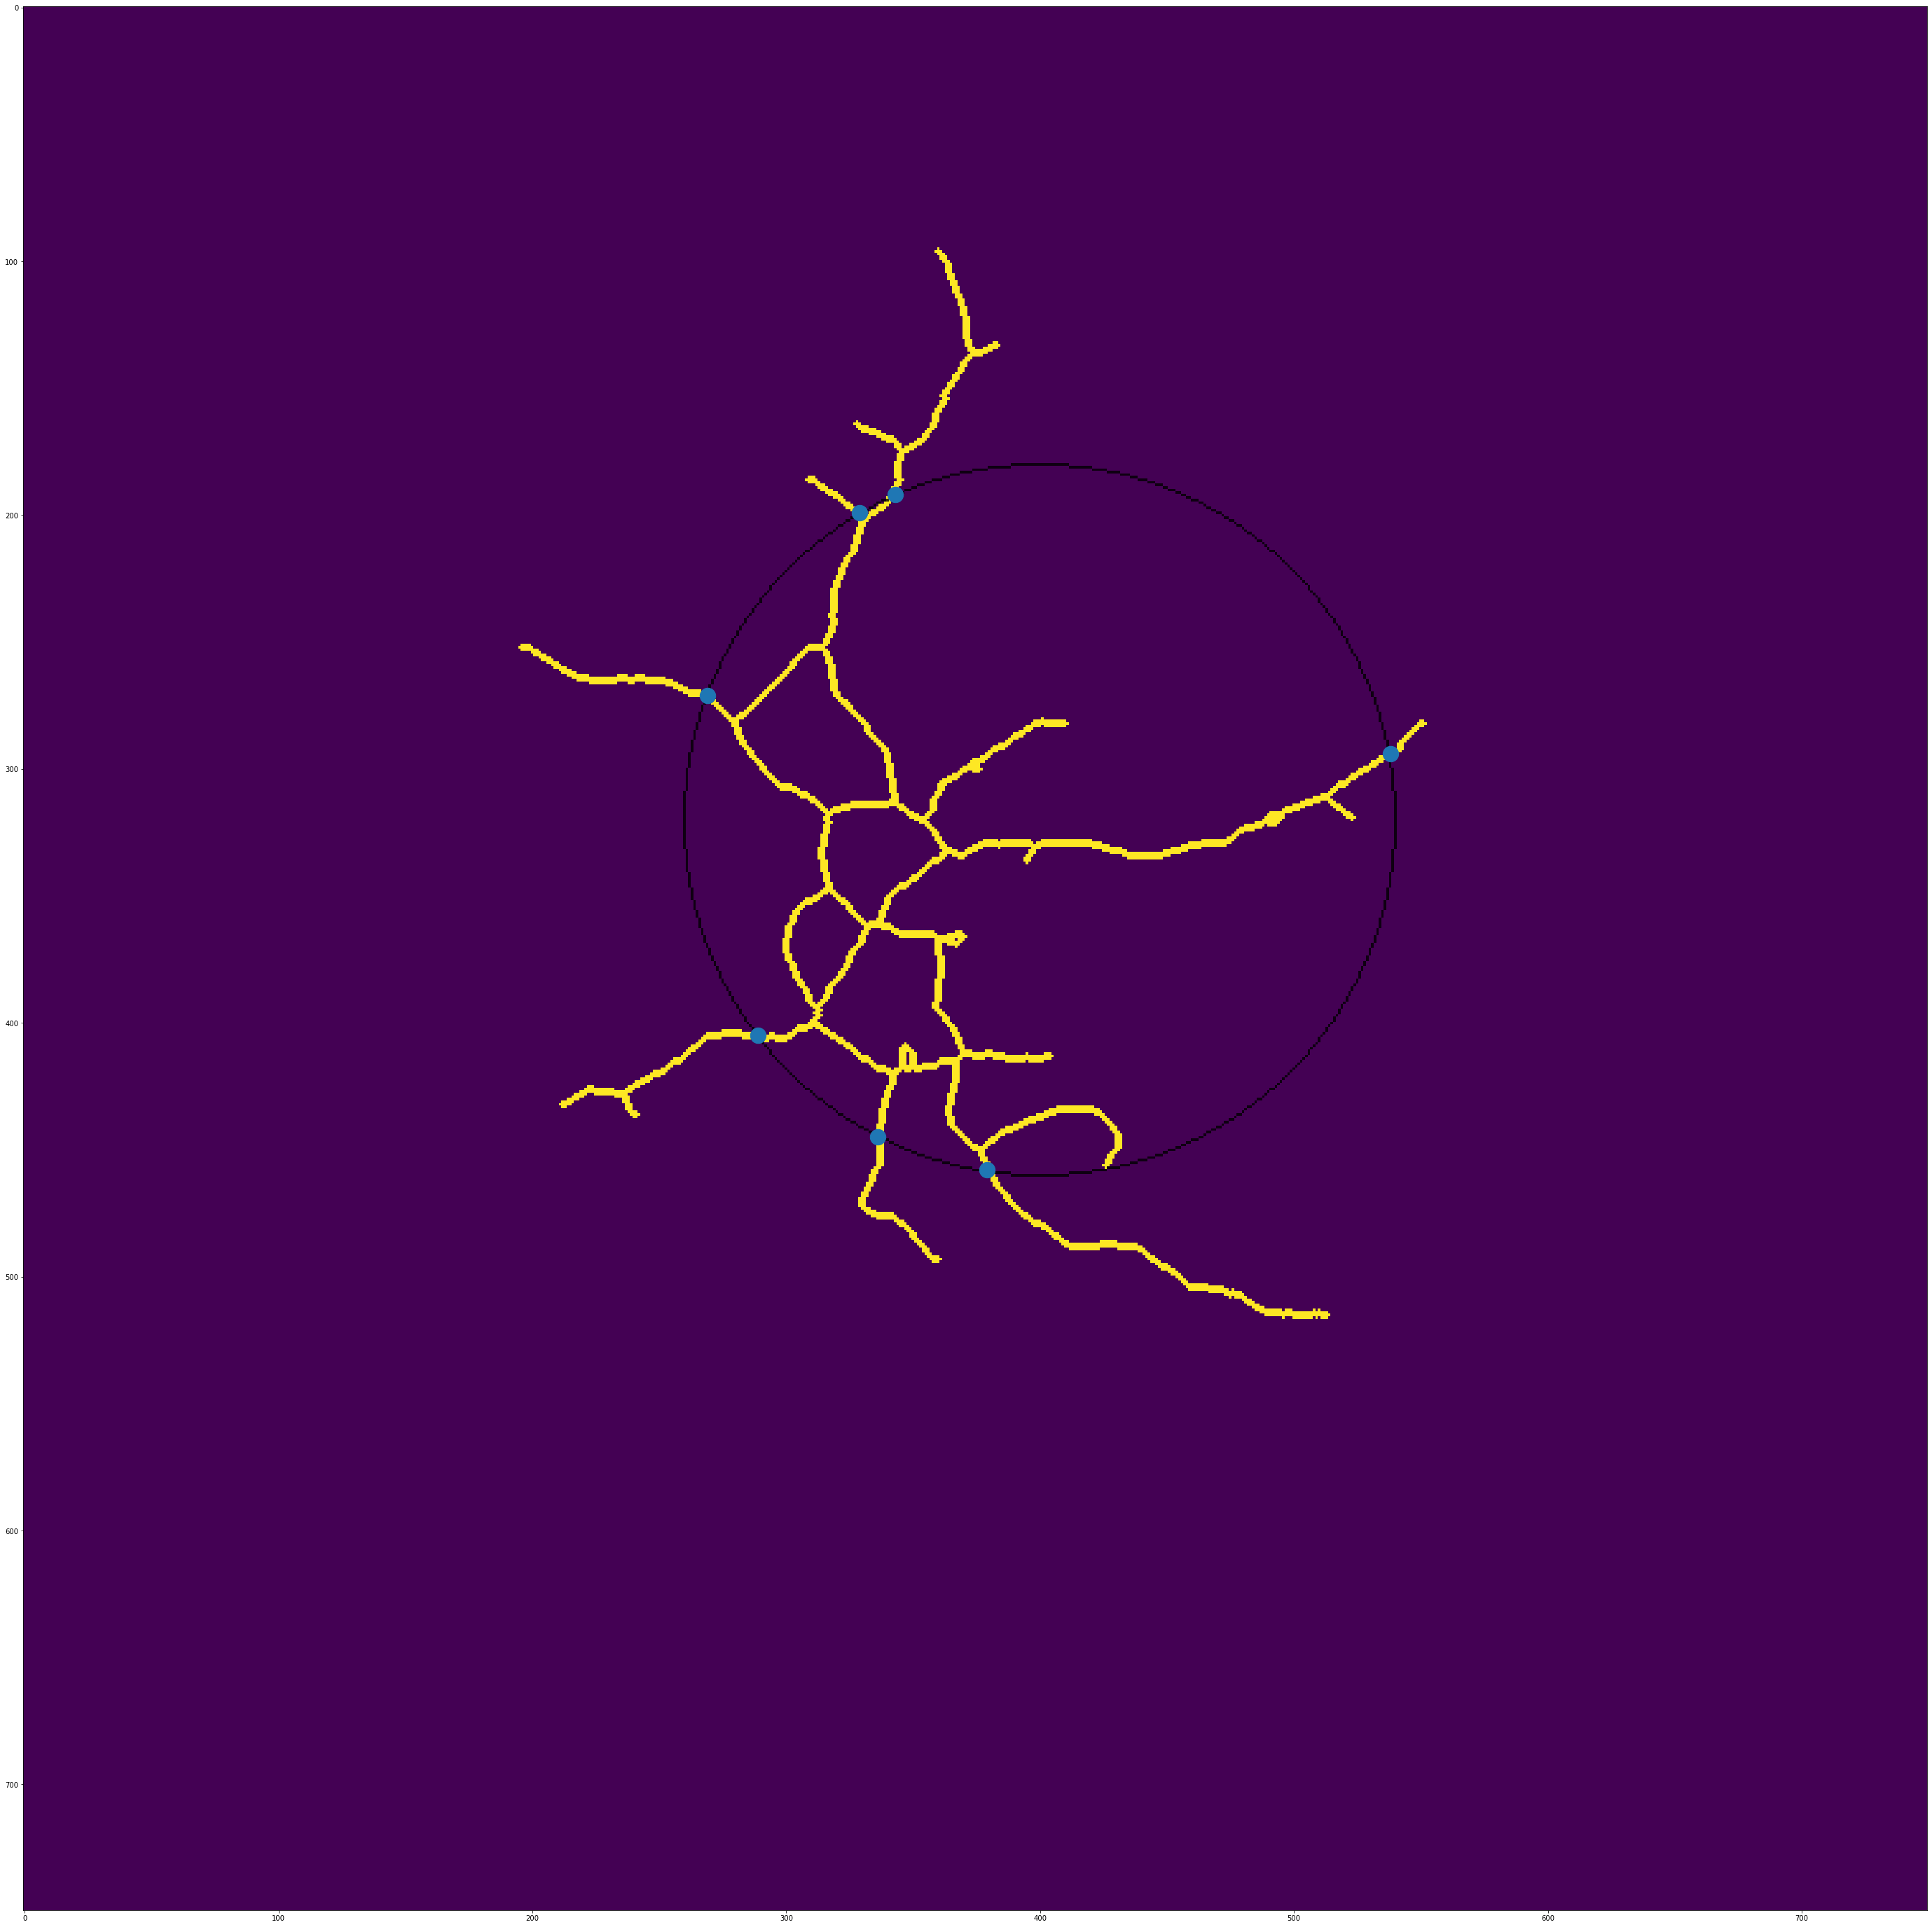

In [294]:
import matplotlib as mpl
from matplotlib.colors import colorConverter
color1 = colorConverter.to_rgba('white')
color2 = colorConverter.to_rgba('black')
cmap2 = mpl.colors.LinearSegmentedColormap.from_list('my_cmap2',[color1,color2],256)
cmap2._init() # create the _lut array, with rgba values
alphas = np.linspace(0, 0.8, cmap2.N+3)
cmap2._lut[:,-1] = alphas

fig, ax1 = plt.subplots(1, figsize = (50,50), sharey = False)
ax1.imshow(img, origin = 'lower')
ax1.imshow(circles, interpolation='nearest', origin='lower', cmap = cmap2)
ax1.invert_yaxis()
ax1.scatter(final_intersections[1].values, final_intersections[0].values, s = 500)